In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import lacroix

# fasta

In [2]:
app = pd.read_csv('/novo/projects/departments/cdd/public/users/ehec/sbxw_files_2/fibrillatioNN_prediction/sbxw/tables/seuma2022_41467_2022_34742_MOESM6_ESM_allvariants_labels.csv')
app.head(2)

,Unnamed: 0,aa_seq,ID,dataset,mean_count,nscore_c,nscore1_c,nscore2_c,nscore3_c,sigma,fAD,is_amyloid
0,0,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,WT;D-1-D;A-2-A;E-3-E;F-4-F;R-5-R;H-6-H;D-7-D;S...,WT,1.527546e+06,0.000000,0.241693,0.018870,-0.218536,0.455606,non-fAD,False
1,1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,D-1-K,single,7.256667e+02,0.479471,0.590382,0.191242,0.848050,0.461254,non-fAD,False


In [6]:
with open('abeta_mutants.fa', 'w') as fasta_file:
    for idx, row in app.iterrows():

        header = f">mutant_{idx}" 
        sequence = row['aa_seq']
        
        fasta_file.write(f"{header}\n")
        fasta_file.write(f"{sequence}\n")

# Tango/waltz

In [3]:
t = pd.read_csv('/novo/projects/departments/cdd/public/users/ehec/au24/2504_benchmarking_for_paper/tango_app_mutant.csv')
app['tango'] = t['Tango']
app['waltz'] = t['Waltz']
wt_df = app[app['dataset'] == 'WT']
app_df = app[app['dataset'] != 'WT']
wt_df

,Unnamed: 0,aa_seq,ID,dataset,mean_count,nscore_c,nscore1_c,nscore2_c,nscore3_c,sigma,fAD,is_amyloid,tango,waltz
0,0,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,WT;D-1-D;A-2-A;E-3-E;F-4-F;R-5-R;H-6-H;D-7-D;S...,WT,1527545.667,0.0,0.241693,0.01887,-0.218536,0.455606,non-fAD,False,37.875476,5.88769


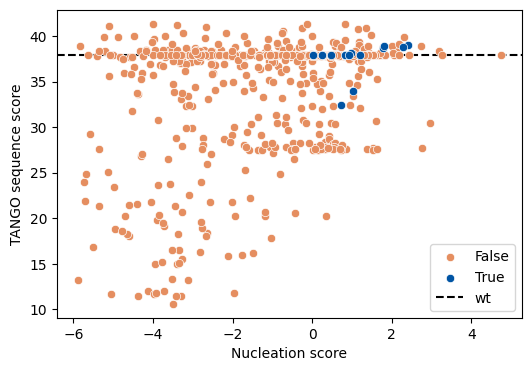

In [64]:
fig = plt.figure(figsize=(6,4))
sns.scatterplot(y=app_df[app_df['is_amyloid'] == False]['tango'], x=app_df[app_df['is_amyloid'] == False]['nscore3_c'], label='False', c=lacroix.colorList('PeachPear')[1])
sns.scatterplot(y=app_df[app_df['is_amyloid'] == True]['tango'], x=app_df[app_df['is_amyloid'] == True]['nscore3_c'], label='True', c=lacroix.colorList('Lime')[4])
plt.axhline(y=wt_df['tango'][0], color='k', linestyle='--',zorder=0, label='wt')
plt.ylabel('TANGO sequence score')
plt.xlabel('Nucleation score')

plt.legend()
plt.show()

In [18]:
roc_auc_score(app_df['is_amyloid'].astype(float),app_df['tango'])

0.7388253638253638

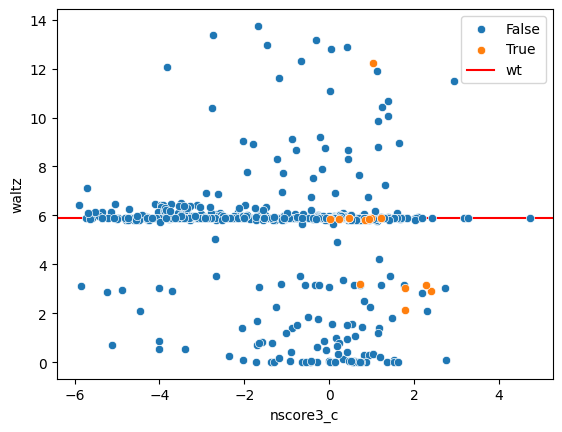

In [19]:
sns.scatterplot(y=app_df[app_df['is_amyloid'] == False]['waltz'], x=app_df[app_df['is_amyloid'] == False]['nscore3_c'], label='False')
sns.scatterplot(y=app_df[app_df['is_amyloid'] == True]['waltz'], x=app_df[app_df['is_amyloid'] == True]['nscore3_c'], label='True')
plt.axhline(y=wt_df['waltz'][0], color='r', linestyle='-',zorder=0, label='wt')
plt.legend()

In [20]:
roc_auc_score(app_df['is_amyloid'].astype(float),app_df['waltz'])

0.27448024948024946

# aggreprot

In [26]:
l = []
with open('/novo/projects/departments/cdd/public/users/ehec/au24/2504_benchmarking_for_paper/aggreprot_exec/app_mutants/batch-profile-final-max.txt', 'r') as f:
    for line in f.readlines():
        entries = line.split('\t')
        numerics = [float(i) for i in entries[2:]]
        #ans = entries[:2] + [max(numerics)]
        ans = max(numerics)
        l.append(ans)

In [29]:
app['aggreprot'] = l
wt_df = app[app['dataset'] == 'WT']
app_df = app[app['dataset'] != 'WT']

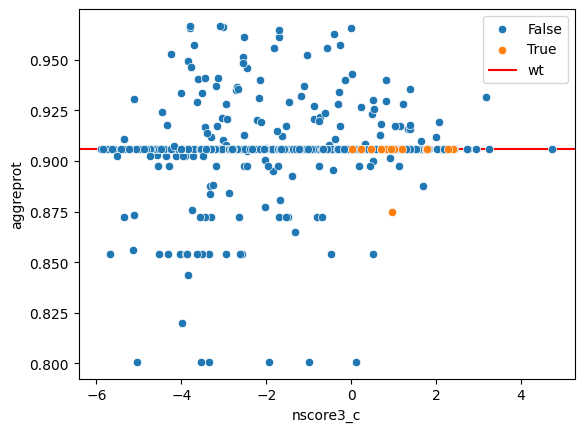

In [30]:
sns.scatterplot(y=app_df[app_df['is_amyloid'] == False]['aggreprot'], x=app_df[app_df['is_amyloid'] == False]['nscore3_c'], label='False')
sns.scatterplot(y=app_df[app_df['is_amyloid'] == True]['aggreprot'], x=app_df[app_df['is_amyloid'] == True]['nscore3_c'], label='True')
plt.axhline(y=wt_df['aggreprot'][0], color='r', linestyle='-',zorder=0, label='wt')
plt.legend()

In [31]:
roc_auc_score(app_df['is_amyloid'].astype(float),app_df['aggreprot'])

0.45602910602910607

# nnk4 aggreprot 

In [41]:
nnk4 = pd.read_csv('/novo/projects/departments/cdd/public/users/ehec/au24/datasets/nnk4_truefull_nostop.csv').dropna()
nnk4.head(3)

,Unnamed: 0,sequence,len,value_bool
0,0,KKQETSSRIMRLVGL,15,0
1,1,KKL,3,0
2,2,KKFINSSR,8,1


In [44]:
nnk4_g6 = nnk4[nnk4['len'] >= 6]
with open('nnk4_g6.fa', 'w') as fasta_file:
    for idx, row in nnk4_g6.iterrows():

        header = f">mutant_{idx}" 
        sequence = row['sequence']
        
        fasta_file.write(f"{header}\n")
        fasta_file.write(f"{sequence}\n")
len(nnk4_g6), len(nnk4)

(6046, 7394)

In [47]:
g = []
with open('/novo/projects/departments/cdd/public/users/ehec/au24/2504_benchmarking_for_paper/aggreprot_exec/nnk4_g6/batch-profile-final-max.txt', 'r') as f:
    for line in f.readlines():
        entries = line.split('\t')
        numerics = [float(i) for i in entries[2:]]
        #ans = entries[:2] + [max(numerics)]
        ans = max(numerics)
        g.append(ans)

In [48]:
nnk4_g6['aggreprot'] = g

/tmp/ipykernel_17192/2053822015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nnk4_g6['aggreprot'] = g


In [51]:
roc_auc_score(nnk4_g6['value_bool'].astype(float),nnk4_g6['aggreprot'])

0.677493339450293